<B>GRIP 2021</B>

<B>TASK-1 (Data Science & Business Analytics Internship)</B>

<B>Made By: KUNAL ANAND</B>
        

## Predicting The Percentage Of Student On The Basis Of Study Hours

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
#Linear Regression Model 
from sklearn.linear_model import LinearRegression
# Metrices for analyzing the model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
# Reading the Dataset
dataset=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Counting the no. of null values in the datset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# checking the percentage of missing data contains in all the columns
missing_percentage = dataset.isnull().sum()/100
print(missing_percentage)

Hours     0.0
Scores    0.0
dtype: float64


In [5]:
#it defines the count,means,min , max and quartile of each columns
dataset.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Checking the relationship btw Hours and Scores
dataset.corr()['Hours'].sort_values()

Scores    0.976191
Hours     1.000000
Name: Hours, dtype: float64

In [24]:
# Counting some values
print('Total = ',len(dataset))
print('Number of Study Hours = ',len('Hours'))
print('Percentage Study Hours = ', len('Hours')/len(dataset) * 100, "%")
print('Scores =', len('Scores'))
print('Percentage Scores  = ', len('Scores')/len(dataset) * 100, "%")

Total =  25
Number of Study Hours =  5
Percentage Study Hours =  20.0 %
Scores = 6
Percentage Scores  =  24.0 %


Text(27.125, 0.5, 'Percentage Score')

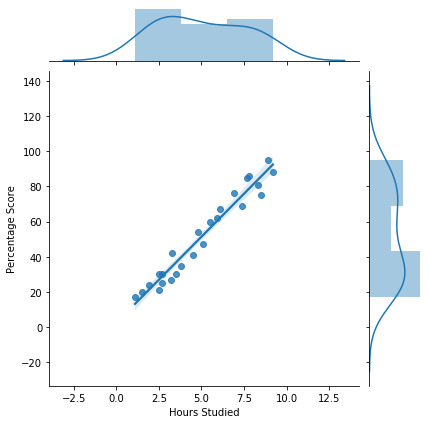

In [25]:
#Joinplot as type of linear regression to see relationship and the value range btw 2 features
#Analysisng the plot of the score vs hours
import seaborn as sns
sns.jointplot(x='Hours',y='Scores',data=dataset,kind='reg') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

<B>HERE WE CAN SEE THE POSITIVE LINAER REGRESSION BETWEEN THE HOURS AND THE SCORES FOR STUDENT</B>

### Correlation Matrix

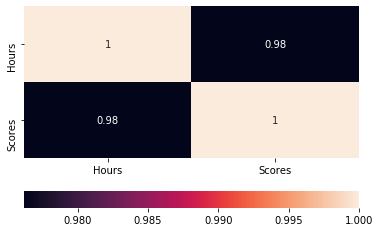

In [27]:
sns.heatmap(dataset.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

## Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)

In [8]:
X = dataset.iloc[:, :-1].values  
Y = dataset.iloc[:, 1].values 

In [9]:
print("size of independent coloumn    X-->",X.shape,'\nsize of dependent coloumn      Y-->',Y.shape)

size of independent coloumn    X--> (25, 1) 
size of dependent coloumn      Y--> (25,)


Splitting the data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:


In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.5, random_state=21)

print('X training data',X_train.shape,'X test data',X_test.shape)
print('Y training data',Y_train.shape,'X test data',Y_test.shape)

X training data (12, 1) X test data (13, 1)
Y training data (12,) X test data (13,)


In [11]:
regressor = LinearRegression()  
print('Training Start of model')
regressor.fit(X_train, Y_train) 
print(regressor)
print("Training complete.")

Training Start of model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training complete.


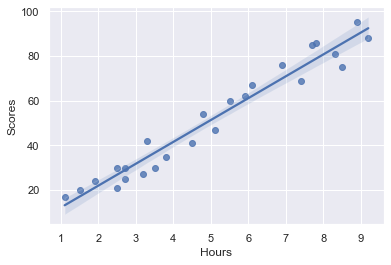

In [12]:
# Visualising the Training set results
import seaborn as sns
sns.set(color_codes=True)
ax = sns.regplot(x="Hours", y="Scores", data= dataset)

## Making Predictions

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[5.1]
 [6.1]
 [3.3]
 [1.5]
 [5.5]
 [7.4]
 [6.9]
 [5.9]
 [3.8]
 [2.5]
 [2.7]
 [9.2]
 [7.8]]


Text(0, 0.5, 'Scores')

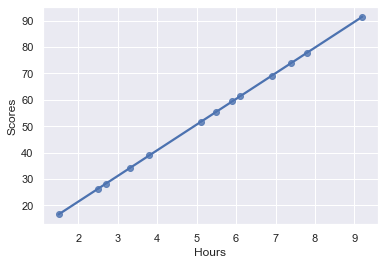

In [28]:
# Visualising the Test set results
import seaborn as sns
sns.set(color_codes=True)
ax = sns.regplot(x=X_test, y=y_pred, data= dataset)
plt.xlabel("Hours")
plt.ylabel("Scores")

In [14]:
# Comparing Actual vs Predicted
dataset = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,47,51.582474
1,67,61.301833
2,42,34.087629
3,20,16.592784
4,60,55.470218
5,69,73.936999
6,76,69.077320
7,62,59.357961
8,35,38.947308
9,21,26.312142


In [16]:
# You can also test with your own data
single_user = 9.25
student_prediction = y_pred
print("No of Hours = {}".format(single_user))
print("Predicted Score = {}".format(student_prediction[0]))

No of Hours = 9.25
Predicted Score = 51.582474226804116


<B>EVALATION OF THE MODEL ON THE BASIC OF RMSE , MAE AND OTHER MAJORS</B>

In [17]:
from sklearn import metrics  
from sklearn.metrics import accuracy_score

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 

print('R2 score:', metrics.r2_score(Y_test, y_pred)*100)

Mean Absolute Error: 4.864789849325929
R2 score: 94.59761498684507


## Summary of Linear Regression

In [19]:
import statsmodels.api as sm

# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(X)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(endog = Y, exog=x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           9.13e-17
Time:                        14:31:03   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""